In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('select.csv')
data = data.drop(data.columns[0], axis=1)

In [3]:
class Characeter:
    def __init__(self,level):
        self.level = level
        self.hitPower = 0
        self.hitTime = 0
        self.hit = 0
    def checkHit(self):
        if self.hit:
            self.hitTime -= 1
            if self.hitTime > 0:
                return 0
            else:
                self.hit = 0
                return self.hitPower
        else:
            return 0
        
class Rei(Characeter):
    def __init__(self,level):
        super().__init__(level)
        self.hitPower = 0.6 + 0.6 * self.level
    def checkSkill(self,skill):
        if skill == '技能1：ウィンドスラスト':
            return self.up()
        else:
            return 0
    def up(self):
        if self.hit:
            return 0
        else:
            self.hit = 1
            self.hitTime = 12
            return self.hitPower
    
class Christina(Characeter):
    def __init__(self,level):
        super().__init__(level)
        self.hitPower = 0.6 + 0.6 * self.level
    def checkSkill(self,skill):
        if skill == '技能2：インジェクション':
            return self.up()
        else:
            return 0
    def up(self):
        if self.hit:
            return 0
        else:
            self.hit = 1
            self.hitTime = 12
            return self.hitPower
    
class ShizuruValentine(Characeter):
    def __init__(self,level):
        super().__init__(level)
        self.hitPower = 0.15 + 0.15 * self.level
    def checkSkill(self,skill):
        if skill == '技能2：セグメントハートショット':
            return self.up()
        else:
            return 0
    def up(self):
        if self.hit:
            return 0
        else:
            self.hit = 1
            self.hitTime = 12
            return self.hitPower

In [4]:
#Input
level = 172
a = Rei(level)
b = Christina(level)
c = ShizuruValentine(level)
objList = [a,b,c]

In [5]:
countList = []
count = 0
for j in range(data.shape[1]):
    for i in range(data.shape[0]):
        for obj in objList:
            count += obj.checkSkill(data.loc[i][j])
    for obj in objList:
        count -= obj.checkHit()
    countList.append(count)

In [6]:
timeList = data.columns.tolist()
timeList = timeList[1:]
countList = countList[1:]

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

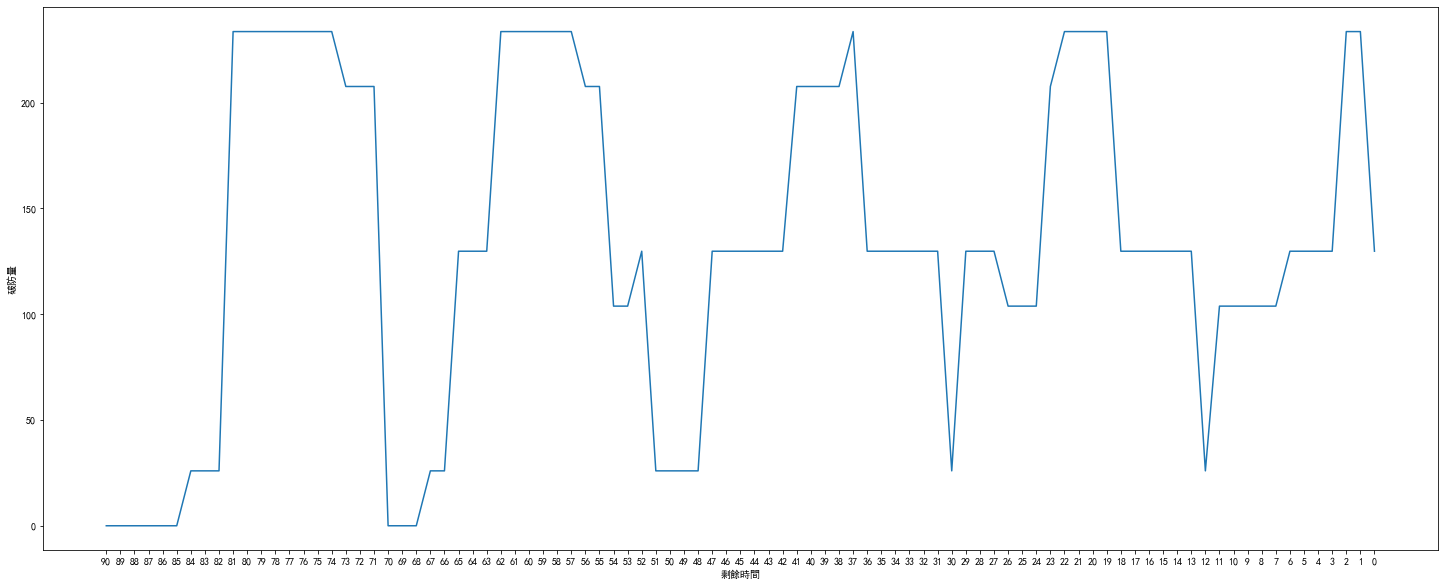

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hits = countList
times = timeList
plt.figure(figsize=(25, 10))
plt.plot(times, hits)
plt.xlabel('剩餘時間')
plt.ylabel('破防量')
plt.savefig('test_output4.png',
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)
plt.show()